# Montreal Neighbourhood Data
- This file is to scape the neighbourhood of Montreeal and postcal code from wikipedia page.
- And derive the longtitude and lattitude of each neighbourhood.

In [1]:
from bs4 import BeautifulSoup # Use 'BeautifulSoup' package to retrive data from a webpage
import re
import requests               # Requesting data from a web address
import csv                    # Creat stream to write the data from webpage to a csv file
import numpy as np   # library for vectorized computation
import pandas as pd  # library to process data as dataframes

## Scrape Neighbourhoods From Wiki Page

In [2]:
source = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_H').text
soup = BeautifulSoup(source,'lxml')

In [3]:
#Open a writable csv file, which we will use to store the postcode table
table_csv = open('Montreal_neighbourhood_wiki.csv','w')
csv_writer = csv.writer(table_csv)
csv_writer.writerow(['PostalCode','Neighbourhood'])

26

In [4]:
# Parser postcode table tag from the webpage
table = soup.find('table')
#print(table)

In [5]:
row_1 = table.findAll('tr')[1]
cell_2 = row_1.findAll('td')[3]
cell_split = cell_2.getText()
cell_split = cell_split[4:len(cell_split)-2]
print(cell_split)

sub_list = re.findall('[S,N,W,E,C][a-z]*', cell_split) 
print(sub_list)

test_list = 'Central North South West East Northeast Northwest Southeast Southwest'
for st in sub_list: 
    if len(st) < 4: continue
    loca =  test_list.find(st)
    if loca != -1:
        print('The cell contains orientation words')
        #cell_split = cell_split[0:cell_split.find(st)+len(st)]
        plc = cell_split.find(st)
        cell_split = cell_split[0:plc]+', '+ cell_split[plc:plc+len(st)]
        break 

print(cell_split) 

Downtown MontrealEast
['East']
The cell contains orientation words
Downtown Montreal, East


In [6]:
test_list = 'Central North South West East Northeast Northwest Southeast Southwest'

for row in table.findAll("tr"):
    for cell in row.findAll("td"):
        text = cell.getText()
        
        if 'Not assigned' in text: continue # Skip this cell if Not assigned
        
        PostalCode = text[1:4]
        Neighbourhood = text[4:len(text)-2]
        
        sub_list = re.findall('[S,N,W,E,C][a-z]*', Neighbourhood) 
        for st in sub_list: 
            if len(st) < 4: continue
            loca =  test_list.find(st)
            if loca != -1:
                #print('The cell contains orientation words')
                #Neighbourhood = Neighbourhood[0:Neighbourhood.find(st)] # Remove orientation word
                plc = Neighbourhood.find(st)
                Neighbourhood = Neighbourhood[0:plc]+', '+ Neighbourhood[plc:plc+len(st)]
                break 

        csv_writer.writerow([PostalCode, Neighbourhood])    

In [7]:
# After writing the table, close up the 'pc_wiki.csv' file.
table_csv.close()

In [8]:
# Read the 'Montreal_neighbourhood_wiki.csv' file into pandas dataframe.
montr_df = pd.read_csv('Montreal_neighbourhood_wiki.csv')
montr_df.head()

,PostalCode,Neighbourhood
0,H1A,Pointe-aux-Trembles
1,H2A,"Saint-Michel, East"
2,H3A,"Downtown Montreal, North"
3,H4A,"Notre-Dame-de-Grâce, Northeast"
4,H5A,Place Bonaventure


In [9]:
# Correct some special neighbourhood names
montr_df.iloc[16]['Neighbourhood'] = 'Griffintown'
montr_df.iloc[108]['Neighbourhood'] = 'Hampstead'
montr_df.iloc[108]['Neighbourhood'] = 'Dorval, Outskirts'
montr_df.iloc[74]['Neighbourhood'] = 'Dorval, Outskirts'
montr_df.iloc[65]['Neighbourhood'] =  'Saint-Laurent, Outer , Northeast'
montr_df.iloc[54]['Neighbourhood'] = 'Saint-Laurent, Inner , Northeast'
montr_df.iloc[56]['Neighbourhood'] = 'Akwesasne'
montr_df.iloc[117]['Neighbourhood'] = 'Pierrefonds-Roxboro'
montr_df.drop(montr_df.index[[32]], inplace=True) # No vaild coordination infor
montr_df.drop(montr_df.index[[55]], inplace=True) # No vaild coordination infor
montr_df = montr_df.reset_index()
montr_df.drop('index', axis=1, inplace=True)
montr_df.isnull().values.any()

False

In [10]:
montr_df.head(60)

,PostalCode,Neighbourhood
0,H1A,Pointe-aux-Trembles
1,H2A,"Saint-Michel, East"
2,H3A,"Downtown Montreal, North"
3,H4A,"Notre-Dame-de-Grâce, Northeast"
4,H5A,Place Bonaventure
5,H7A,Duvernay-Est
6,H9A,"Dollard-des-Ormeaux, Northwest"
7,H1B,"Montreal , East"
8,H2B,"Ahuntsic, North"
9,H3B,"Downtown Montreal, East"


## Latitude and Longitude
Get the latitude and the longitude coordinates of each neighborhood

In [11]:
#! pip install geocoder
import geocoder # import geocoder
from geopy.geocoders import Nominatim

In [12]:
address = 'Saint-Laurent, Montreal'

geolocator = Nominatim(user_agent="tn_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of '+ address+' are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Saint-Laurent, Montreal are 45.5032702, -73.7254477.


In [13]:
lat = []
long = []
Neighbourhood = montr_df['Neighbourhood']

for ind, n in enumerate(Neighbourhood):
    address = n +', Montreal'
    #print(ind,address)
    geolocator = Nominatim(user_agent="tn_explorer")
    location = geolocator.geocode(address)
    if location == None: 
        print('Error: index = ',ind,',', address, 'coorinations not found.')
        latitude = 0
        longitude = 0
    else: 
        latitude = location.latitude
        longitude = location.longitude
    
    lat.append(latitude)
    long.append(longitude)

print(len(lat),len(long))

Error: index =  18 , Saint-Vincent-de-Paul, Montreal coorinations not found.
Error: index =  36 , Auteuil, West, Montreal coorinations not found.
Error: index =  42 , Auteuil, Northeast, Montreal coorinations not found.
Error: index =  48 , Auteuil, South, Montreal coorinations not found.
Error: index =  53 , Saint-Laurent, Inner , Northeast, Montreal coorinations not found.
Error: index =  70 , Fabreville, Montreal coorinations not found.
Error: index =  72 , Dorval, Outskirts, Montreal coorinations not found.
Error: index =  78 , Ville Saint-Pierre, Montreal coorinations not found.
Error: index =  106 , Dorval, Outskirts, Montreal coorinations not found.
121 121


In [14]:
# Fill out the coordinates of the missing indexes
lat[18]  = 45.561727
long[18] = -73.538154
lat[36]  = 45.45286 
long[36] = -73.64918
lat[42]  = 45.6837
long[42] = -73.6728
lat[48]  = 45.6213 
long[48] = -73.7398 
lat[53]  = 45.517 
long[53] = -73.667
#lat[55]  = 44.5816
#long[55] = -74.3831
lat[70]  = 45.5766
long[70] = -73.8107
lat[72]  = 45.4503
long[72] = -73.7500
lat[78]  = 45.44577 
long[78] = -73.64617
lat[106] = 45.45032 
long[106]= -73.7500

lat[45]  = 45.53    # Correct the mistakes on coordinations from google
long[45] = -73.5672
lat[51]  = 45.5252  # Correct the mistakes on coordinations from google
long[51] = -73.5744 

In [15]:
print(len(lat),len(long))

121 121


In [16]:
lat_df = pd.DataFrame({'Latitude': lat})
long_df = pd.DataFrame({'Longitude': long})
montr_df = pd.concat([montr_df,lat_df,long_df], axis=1)

In [17]:
# Remove outliers
montr_df.drop(montr_df.index[[12]], inplace=True) 
montr_df = montr_df.reset_index()

In [18]:
montr_df
#montr_df.dtypes

,index,PostalCode,Neighbourhood,Latitude,Longitude
0,0,H1A,Pointe-aux-Trembles,45.690414,-73.490689
1,1,H2A,"Saint-Michel, East",45.559813,-73.599942
2,2,H3A,"Downtown Montreal, North",45.499788,-73.571224
3,3,H4A,"Notre-Dame-de-Grâce, Northeast",45.467967,-73.628922
4,4,H5A,Place Bonaventure,45.499583,-73.564917
5,5,H7A,Duvernay-Est,45.596601,-73.659459
6,6,H9A,"Dollard-des-Ormeaux, Northwest",45.484230,-73.806455
7,7,H1B,"Montreal , East",45.497216,-73.610364
8,8,H2B,"Ahuntsic, North",45.558138,-73.657409
9,9,H3B,"Downtown Montreal, East",45.499788,-73.571224


### Create a map of Montreal with neighborhoods superimposed on top

In [19]:
#! pip install folium
import folium # map rendering library

In [20]:
# Create a map using coordinate of Montreal
montr_lat = 45.505331312 
montr_long = -73.55249779
map_montr = folium.Map(location=[montr_lat, montr_long], zoom_start=10)
#map_montr

In [21]:
# add markers to map
for lat, lng, neighbourhood in zip(montr_df['Latitude'], montr_df['Longitude'], montr_df['Neighbourhood']):
    label = '{}'.format(neighbourhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_montr)  
    
map_montr

# Montreal Neighbourhoods Data from Foursquare API

In [22]:
import json # library to handle JSON files
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import numpy as np
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans
# Import metrics library - jaccard_similarity_score function
from sklearn import metrics

In [23]:
CLIENT_ID = '4MIXTGO3DB01HSNLMM2BKUSNFD1IZ2BQUB0JF1HOOLHTFOTK' # your Foursquare ID
CLIENT_SECRET = 'NGSDMH0BKBEN4BYBVK5IWIB3TVDAD1LA0IL0IKLHB3EWR3OR' # your Foursquare Secret
VERSION = '20190611' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 4MIXTGO3DB01HSNLMM2BKUSNFD1IZ2BQUB0JF1HOOLHTFOTK
CLIENT_SECRET:NGSDMH0BKBEN4BYBVK5IWIB3TVDAD1LA0IL0IKLHB3EWR3OR


In [24]:
# Get the neighborhood's latitude and longitude values.
nbhood_latitude = montr_df.loc[0,'Latitude']  # neighborhood latitude value
nbhood_longitude= montr_df.loc[0,'Longitude'] # neighborhood longitude value
nbhood_name = montr_df.loc[0,'Neighbourhood']  # neighborhood name
print('Latitude and longitude values of {} are {}, {}.'.format(nbhood_name,nbhood_latitude,nbhood_longitude))

Latitude and longitude values of Pointe-aux-Trembles are 45.6904144, -73.4906885.


**Now, let's get the top 100 venues that are in 'Pointe-aux-Trembles' within a radius of 5000 meters.**

In [25]:
radius = 5000
LIMIT = 100
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'\
      .format(CLIENT_ID,CLIENT_SECRET, nbhood_latitude, nbhood_longitude, VERSION, radius, LIMIT)
                                                                                                                           
url 

'https://api.foursquare.com/v2/venues/explore?client_id=4MIXTGO3DB01HSNLMM2BKUSNFD1IZ2BQUB0JF1HOOLHTFOTK&client_secret=NGSDMH0BKBEN4BYBVK5IWIB3TVDAD1LA0IL0IKLHB3EWR3OR&ll=45.6904144,-73.4906885&v=20190611&radius=5000&limit=100'

In [26]:
# Send the GET request and examine the resutls
results = requests.get(url).json()

In [27]:
# Convert venues to pandas dataframe
venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues) # flatten JSON

In [28]:
# Filter out main features of venues
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues = nearby_venues[filtered_columns]
range(nearby_venues.shape[0])

range(0, 62)

In [29]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [30]:
# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

In [31]:
# clean title of the columns
nearby_venues.columns = [col.split('.')[-1] for col in nearby_venues.columns]
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

62 venues were returned by Foursquare.


**Repeat the above for each Neighbourhood in Montreal**

In [32]:
def getNearbyVunues(nbhood_latitude,nbhood_longitude,nbhood_name,radius,LIMIT):
    
    venues_list = pd.DataFrame()
    
    for name, lat, lng in zip(nbhood_name, nbhood_latitude,nbhood_longitude):
        url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'\
               .format(CLIENT_ID,CLIENT_SECRET, lat, lng, VERSION, radius, LIMIT)
        
        results = requests.get(url).json()
        venues = results['response']['groups'][0]['items']
        nearby_venues = json_normalize(venues)
        nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)
        print(name,'....Done.')
        
        # return only relevant information for each nearby venue
        for ind in  range(nearby_venues.shape[0]):
            
            venues_list = venues_list.append({'Neighbourhood': name,
                                              'Neighbourhood Latitude': lat, 
                                              'Neighbourhood Longitude': lng,
                                              'Venue': nearby_venues['venue.name'][ind],
                                              'Venue Latitude':  nearby_venues['venue.location.lat'][ind],
                                              'Venue Longitude': nearby_venues['venue.location.lng'][ind],
                                              'Venue Category':nearby_venues['venue.categories'][ind]}, ignore_index=True)
            
    return(venues_list)

In [33]:
# Get venues of Montreal Neighbourhood
montr_venues = getNearbyVunues(montr_df['Latitude'],
                                 montr_df['Longitude'],
                                 montr_df['Neighbourhood'],
                                 radius = 5000,
                                 LIMIT = 100 )
montr_venues.shape

Pointe-aux-Trembles ....Done.
Saint-Michel, East ....Done.
Downtown Montreal, North ....Done.
Notre-Dame-de-Grâce, Northeast ....Done.
Place Bonaventure ....Done.
Duvernay-Est ....Done.
Dollard-des-Ormeaux, Northwest ....Done.
Montreal , East ....Done.
Ahuntsic, North ....Done.
Downtown Montreal, East ....Done.
Notre-Dame-de-Grâce, Southwest ....Done.
Place Desjardins ....Done.
Dollard-des-Ormeaux, East ....Done.
Rivière-des-Prairies, Northeast ....Done.
Ahuntsic, Central ....Done.
Griffintown ....Done.
Saint-Henri ....Done.
Saint-Vincent-de-Paul ....Done.
L'Île-Bizard, Northeast ....Done.
Rivière-des-Prairies, Southwest ....Done.
Villeray, Northeast ....Done.
L'Île-Des-Soeurs ....Done.
Ville Émard ....Done.
Duvernay ....Done.
L'Île-Bizard, Southwest ....Done.
Montréal-Nord, North ....Done.
Petite-Patrie, Northeast ....Done.
Downtown Montreal, Southeast ....Done.
Verdun, North ....Done.
Pont-Viau ....Done.
Dollard-des-Ormeaux, Southwest ....Done.
Montréal-Nord, South ....Done.
Plateau 

(11635, 7)

In [34]:
montr_venues.head()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Category,Venue Latitude,Venue Longitude
0,Pointe-aux-Trembles,45.690414,-73.490689,Dairy Queen,Fast Food Restaurant,45.696294,-73.491945
1,Pointe-aux-Trembles,45.690414,-73.490689,Parc-nature de la Pointe-aux-Prairies,Park,45.678834,-73.501162
2,Pointe-aux-Trembles,45.690414,-73.490689,Club de Golf de l'île de Montréal,Golf Course,45.685743,-73.511631
3,Pointe-aux-Trembles,45.690414,-73.490689,SAQ,Liquor Store,45.712659,-73.512430
4,Pointe-aux-Trembles,45.690414,-73.490689,Bulk Barn,Food & Drink Shop,45.718219,-73.504171


In [35]:
print('There are {} unique categories.'.format(len(montr_venues['Venue Category'].unique())))

There are 224 unique categories.


**Explore venue category in each neighbourhood**

In [36]:
# one hot encoding
montr_onehot = pd.get_dummies(montr_venues[['Venue Category']], prefix="", prefix_sep="")
# add neighborhood column back to dataframe
montr_onehot.insert(loc=0, column='AllNeighbourhoods', value=montr_venues['Neighbourhood'])

montr_onehot.head()

,AllNeighbourhoods,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,...,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Yoga Studio,Zoo
0,Pointe-aux-Trembles,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Pointe-aux-Trembles,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Pointe-aux-Trembles,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Pointe-aux-Trembles,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Pointe-aux-Trembles,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Group rows by neighbourhood and by taking the mean of the frequency of occurrence of each category**

In [37]:
montr_grouped = montr_onehot.groupby('AllNeighbourhoods').mean().reset_index()
montr_grouped.head()

,AllNeighbourhoods,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,...,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Yoga Studio,Zoo
0,Laval-sur-le-Lac,0.0,0.0,0.0,0.0,0.01,0.0,0.0,0.0,0.01,...,0.0,0.0,0.0,0.0,0.02,0.01,0.00,0.0,0.01,0.0
1,"Ahuntsic, Central",0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.01,...,0.0,0.0,0.0,0.0,0.02,0.00,0.01,0.0,0.00,0.0
2,"Ahuntsic, East",0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.01,...,0.0,0.0,0.0,0.0,0.02,0.00,0.01,0.0,0.00,0.0
3,"Ahuntsic, North",0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.01,...,0.0,0.0,0.0,0.0,0.02,0.00,0.01,0.0,0.00,0.0
4,"Ahuntsic, Southeast",0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.01,...,0.0,0.0,0.0,0.0,0.02,0.00,0.01,0.0,0.00,0.0


## Let us see the top 10 venues in each neighbourhood of Montreal

In [38]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [39]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['AllNeighbourhoods']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['AllNeighbourhoods'] = montr_grouped['AllNeighbourhoods']

for ind in np.arange(montr_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(montr_grouped.iloc[ind, :], num_top_venues)

neighbourhoods_venues_sorted.head()

,AllNeighbourhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Laval-sur-le-Lac,Coffee Shop,Restaurant,Italian Restaurant,Fast Food Restaurant,Breakfast Spot,Grocery Store,Bakery,Sushi Restaurant,Food & Drink Shop,Park
1,"Ahuntsic, Central",Café,Bakery,Park,Italian Restaurant,Breakfast Spot,Restaurant,Liquor Store,French Restaurant,Cheese Shop,Boutique
2,"Ahuntsic, East",Café,Bakery,Park,Italian Restaurant,Breakfast Spot,Restaurant,Liquor Store,French Restaurant,Cheese Shop,Boutique
3,"Ahuntsic, North",Café,Bakery,Park,Italian Restaurant,Breakfast Spot,Restaurant,Liquor Store,French Restaurant,Cheese Shop,Boutique
4,"Ahuntsic, Southeast",Café,Bakery,Park,Italian Restaurant,Breakfast Spot,Restaurant,Liquor Store,French Restaurant,Cheese Shop,Boutique


# Cluster Montreal Neighbourhoods
**Choose the optimum number of clusters using Elbow Curve**

In [40]:
montr_grouped_clustering = montr_grouped.drop('AllNeighbourhoods', 1)

In [41]:
kclusters = range(1, 13)
kmeans = [KMeans(n_clusters=i, random_state=0).fit(montr_grouped_clustering) for i in kclusters]
kmeans
score = [kmeans[i].score(montr_grouped_clustering) for i in range(len(kmeans))]
score

[-1.8672489770115208,
 -1.3086446376957284,
 -1.1412293617217024,
 -1.0303522399432683,
 -0.9347402353849581,
 -0.85691360521473703,
 -0.79051073868521793,
 -0.73916966679648621,
 -0.65872076922133693,
 -0.62872231198198147,
 -0.57715783873722359,
 -0.53681557033064142]

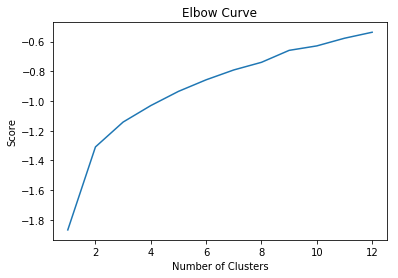

In [42]:
plt.plot(kclusters,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

**Run k-means to cluster the neighbourhood into 2 clusters.**
- From the elbow curve, the optimum number of clusters is indicated to be 2, since another cluster doesn't give much better modeling of the data.

In [43]:
# set number of clusters
k_clusters = 2

# run k-means clustering
kmeans = KMeans(n_clusters=k_clusters, random_state=0).fit(montr_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0], dtype=int32)

In [44]:
neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [45]:
montr_merged = montr_df.join(neighbourhoods_venues_sorted.set_index('AllNeighbourhoods'), on='Neighbourhood')

In [46]:
montr_merged.head()

,index,PostalCode,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,H1A,Pointe-aux-Trembles,45.690414,-73.490689,0,Pharmacy,Coffee Shop,Restaurant,Italian Restaurant,Grocery Store,Park,Fast Food Restaurant,Breakfast Spot,Gas Station,Supermarket
1,1,H2A,"Saint-Michel, East",45.559813,-73.599942,1,Café,Park,Breakfast Spot,Italian Restaurant,Bakery,French Restaurant,Grocery Store,Bar,Restaurant,Asian Restaurant
2,2,H3A,"Downtown Montreal, North",45.499788,-73.571224,1,Café,Hotel,French Restaurant,Cocktail Bar,Restaurant,Portuguese Restaurant,Spa,Tea Room,Italian Restaurant,Concert Hall
3,3,H4A,"Notre-Dame-de-Grâce, Northeast",45.467967,-73.628922,1,Park,Café,Gym,Coffee Shop,French Restaurant,Liquor Store,Ice Cream Shop,Mexican Restaurant,Bakery,Breakfast Spot
4,4,H5A,Place Bonaventure,45.499583,-73.564917,1,Café,Hotel,French Restaurant,Cocktail Bar,Portuguese Restaurant,Italian Restaurant,Concert Hall,Restaurant,Spa,Coffee Shop


## Finally, let's visualize the resulting clusters

In [54]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(k_clusters)
ys = [i + x + (i*x)**2 for i in range(k_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(montr_merged['Latitude'], montr_merged['Longitude'], montr_merged['Neighbourhood'], montr_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster+1), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster],
        fill=True,
        fill_color=rainbow[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [48]:
montr_merged_grouped = montr_merged.sort_values(by=['Cluster Labels', '1st Most Common Venue']).reset_index()
montr_merged_grouped

,level_0,index,PostalCode,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,63,64,H7N,Laval-des-Rapides,45.558897,-73.720778,0,Bakery,Coffee Shop,Greek Restaurant,Grocery Store,Gym,French Restaurant,Bookstore,Dessert Shop,Park,Hotel
1,42,43,H9J,Kirkland,45.452919,-73.864756,0,Coffee Shop,Italian Restaurant,Fast Food Restaurant,Pharmacy,Bakery,Restaurant,Sandwich Place,Sushi Restaurant,Grocery Store,Deli / Bodega
2,53,54,H7L,Sainte-Rose,45.595477,-73.788251,0,Coffee Shop,Breakfast Spot,Pharmacy,Fast Food Restaurant,Grocery Store,Restaurant,Sushi Restaurant,French Restaurant,Italian Restaurant,Shopping Mall
3,69,70,H7P,Fabreville,45.576600,-73.810700,0,Coffee Shop,Pharmacy,Fast Food Restaurant,Sandwich Place,Breakfast Spot,Restaurant,Steakhouse,Clothing Store,Supermarket,Grocery Store
4,71,72,H9P,"Dorval, Outskirts",45.450300,-73.750000,0,Coffee Shop,Hotel,Sandwich Place,Fast Food Restaurant,Italian Restaurant,Airport Lounge,Restaurant,Pharmacy,Café,Scenic Lookout
5,76,77,H7R,Laval-sur-le-Lac,45.607581,-73.564555,0,Coffee Shop,Restaurant,Italian Restaurant,Fast Food Restaurant,Breakfast Spot,Grocery Store,Bakery,Sushi Restaurant,Food & Drink Shop,Park
6,83,84,H7S,"Chomedey, Northeast",45.569048,-73.746087,0,Coffee Shop,Breakfast Spot,Liquor Store,Greek Restaurant,Grocery Store,Bakery,French Restaurant,Dessert Shop,Gym,Hotel
7,84,85,H8S,"Lachine, East",45.448697,-73.711054,0,Coffee Shop,Italian Restaurant,Pharmacy,Hotel,Sandwich Place,Fast Food Restaurant,Bank,Restaurant,Burger Joint,Café
8,85,86,H9S,Dorval / L'Île-Dorval,45.432243,-73.742024,0,Coffee Shop,Italian Restaurant,Hotel,Pharmacy,Airport Lounge,Sandwich Place,Fast Food Restaurant,Restaurant,Café,Grocery Store
9,90,91,H7T,"Chomedey, Northwest",45.569048,-73.746087,0,Coffee Shop,Breakfast Spot,Liquor Store,Greek Restaurant,Grocery Store,Bakery,French Restaurant,Dessert Shop,Gym,Hotel


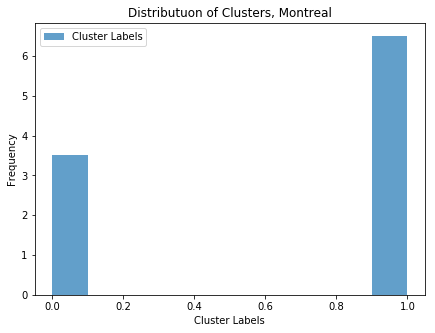

In [49]:
montr_merged_grouped.loc[:,['Cluster Labels']].plot(kind='hist',figsize=(7, 5),normed=1,alpha=0.7)

plt.xlabel('Cluster Labels') # add to x-label to the plot
plt.ylabel('Frequency') # add y-label to the plot
plt.title('Distributuon of Clusters, Montreal') # add title to the plot
plt.show()

In [50]:
# Extrace the each cluster
cluster = {}
for i in range(0,k_clusters):
    clt_data = montr_merged_grouped.loc[montr_merged_grouped['Cluster Labels'] == i, 
                                       montr_merged_grouped.columns[[3] + list(range(7, montr_merged_grouped.shape[1]))]]
    cluster[i] = pd.DataFrame(data=clt_data)

cluster[0].head()


,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Laval-des-Rapides,Bakery,Coffee Shop,Greek Restaurant,Grocery Store,Gym,French Restaurant,Bookstore,Dessert Shop,Park,Hotel
1,Kirkland,Coffee Shop,Italian Restaurant,Fast Food Restaurant,Pharmacy,Bakery,Restaurant,Sandwich Place,Sushi Restaurant,Grocery Store,Deli / Bodega
2,Sainte-Rose,Coffee Shop,Breakfast Spot,Pharmacy,Fast Food Restaurant,Grocery Store,Restaurant,Sushi Restaurant,French Restaurant,Italian Restaurant,Shopping Mall
3,Fabreville,Coffee Shop,Pharmacy,Fast Food Restaurant,Sandwich Place,Breakfast Spot,Restaurant,Steakhouse,Clothing Store,Supermarket,Grocery Store
4,"Dorval, Outskirts",Coffee Shop,Hotel,Sandwich Place,Fast Food Restaurant,Italian Restaurant,Airport Lounge,Restaurant,Pharmacy,Café,Scenic Lookout


In [51]:
frtComVen = {}
for i in range(0,k_clusters):
    frt = cluster[i]['1st Most Common Venue']
    snd = cluster[i]['2nd Most Common Venue']
    trd = cluster[i]['3rd Most Common Venue']
    allVenues = frt.append(snd).append(trd)
    frtComVen[i] = pd.DataFrame(allVenues.value_counts(), columns=['Top 3 Most Common Venues'])

frtComVen[0]

,Top 3 Most Common Venues
Coffee Shop,25
Breakfast Spot,16
Pharmacy,15
Italian Restaurant,14
Fast Food Restaurant,12
Grocery Store,11
Restaurant,7
Café,5
Liquor Store,5
Sandwich Place,4


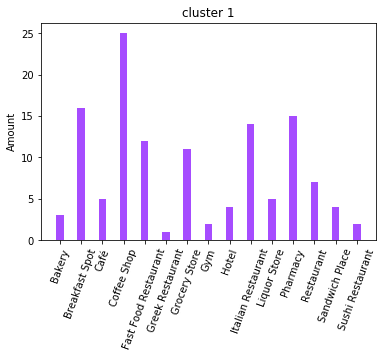

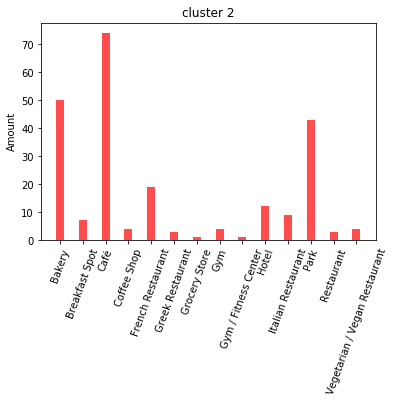

In [52]:
for i in range(0,k_clusters):
    temLable = 'cluster '+str(i+1)
    plt.bar(frtComVen[i].index, frtComVen[i]['Top 3 Most Common Venues'],align='center', width = 0.35,color = rainbow[i],alpha=0.7)
    plt.title('Cluster '+str(i+1))
    plt.xticks(rotation=70)
    plt.ylabel('Amount') 
    plt.title(temLable)
    plt.figsize=(15, 5)
    plt.show()

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


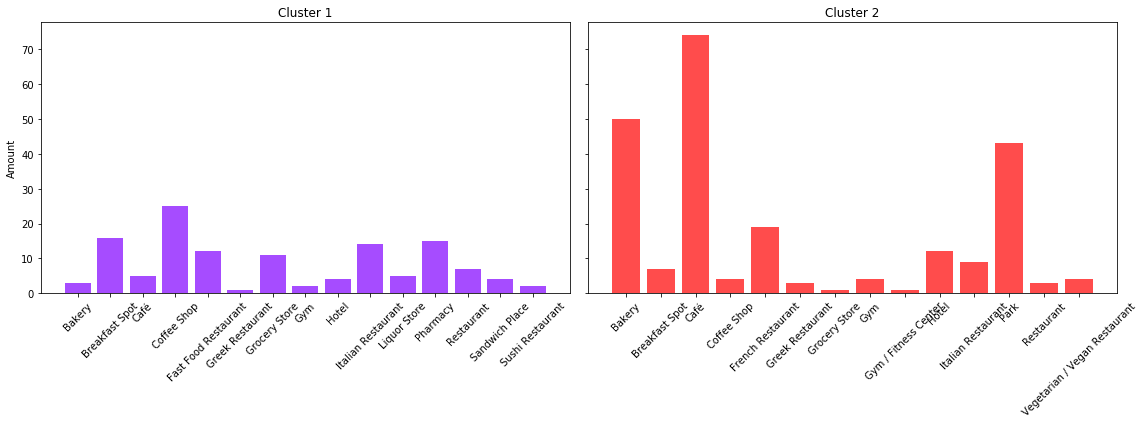

In [53]:
# Subplots all clusters in one figure
fig, axs = plt.subplots(1, k_clusters, figsize=(16, 6), sharey=True, tight_layout=True)

#maxn = 13
for i in range(0,k_clusters):
    temLable = ['cluster '+str(i+1)]
    axs[i].bar(frtComVen[i].index, frtComVen[i]['Top 3 Most Common Venues'],align='center',color = rainbow[i],alpha=0.7, label=temLable)
    axs[i].set_title('Cluster '+str(i+1))
    #axs[i].set_xlim(-0.5,maxn-0.5) 
    for tick in axs[i].get_xticklabels():
        tick.set_rotation(45)

#fig.suptitle('Top 3 Most Common Venues in each cluster',fontsize=16)
axs[0].set_ylabel('Amount') 
fig.show()